#  Data Cleaning and Preparation
* We trying to answer to these questions :

1. Find out how many missing values you have within your dataset? Which columns ? What assumptions can you make about these missing values ( why do we have them missing ? )

2. Get the mean , median , quartiles of each numerical variable within this dataset.

3. Spot the possible outliers in your dataset and get rid of them.

4. How many unique categories do you have ?

5. Is there any column that we need to adjust its type ?


6. Get how many tags you have and which are the most common tags ?

In [ ]:
import pandas as pd

The dataset used is different, let's open it :

In [ ]:
df = pd.read_csv('videosUS.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41415 entries, 0 to 41414
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                41415 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  float64
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  float64
 8   likes                   40949 non-null  float64
 9   dislikes                40949 non-null  float64
 10  comment_count           40949 non-null  float64
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  object 
 13  ratings_disabled        40949 non-null  object 
 14  video_error_or_removed  40949 non-null

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24.0,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Finding missing values

In Pandas missing data is represented by two value:

None: ``None`` is a Python singleton object that is often used for missing data in Python code.

NaN : ``NaN`` (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation


In order to check missing values in Pandas DataFrame, we use a function ``isnull()`` and ``notnull()``. Both function help in checking whether a value is NaN or not. These function can also be used in Pandas Series in order to find null values in a series.

In order to check null values in Pandas DataFrame, we use ``isnull()`` function this function return dataframe of Boolean values which are True for NaN values.

Check missing values for a column in particular.

In [ ]:
# creating bool series True for NaN values 
bool_series = pd.isnull(df['title']) 
    
# filtering data 
# displaying data only with title = NaN 
df[bool_series] 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
53,\nSubscribe to WWE on YouTube: http://bit.ly/1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,\nVisit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,\nMust-See WWE videos on YouTube: https://goo....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,\nSubscribe to WWE on YouTube: http://bit.ly/1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,\nVisit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36570,Follow me on Twitter ► https://twitter.com/mar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36571,Like me on Facebook ► https://www.facebook.com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36572,Join us on Reddit! ► https://www.reddit.com/r/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36573,Horror Outro ► https://soundcloud.com/shurkoff...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Output : As shown in the output image, only the rows having Year = NULL are displayed.

In [ ]:
# Missing values in the dataset
df.isnull().sum()

video_id                     0
trending_date              466
title                      466
channel_title              466
category_id                466
publish_time               466
tags                       466
views                      466
likes                      466
dislikes                   466
comment_count              466
thumbnail_link             466
comments_disabled          466
ratings_disabled           466
video_error_or_removed     466
description               1036
dtype: int64

The values are missing in almost every column !

In [ ]:
# creating bool series True for NaN values 
bool_series = pd.isnull(df['description']) 
    
# filtering data 
# displaying data only with Year = NaN 
df[bool_series][['video_id','tags','likes']]

,video_id,tags,likes
42,NZFhMSgbKKM,[none],7.0
47,sbcbvuitiTc,"NBA|""Basketball""|""Sports""",2017.0
53,\nSubscribe to WWE on YouTube: http://bit.ly/1...,NaN,NaN
54,\nVisit WWE.com: http://goo.gl/akf0J4,NaN,NaN
55,\nMust-See WWE videos on YouTube: https://goo....,NaN,NaN
...,...,...,...
40591,1h7KV2sjUWY,[none],58806.0
40791,1h7KV2sjUWY,[none],58862.0
41004,1h7KV2sjUWY,[none],58980.0
41205,1h7KV2sjUWY,[none],59090.0


In [ ]:
# creating bool series True for NaN values 
bool_series = pd.isnull(df['video_id']) 
    
# filtering data 
# displaying data only with Year = NaN 
df[bool_series]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


Reasons why there are missing values: 

**MNAR** : These games were not made from well known companies (third parties) (For the Publisher values) 

**MCAR** : For the Year value, it may be a transfer of data problem 


## Statistical analysis of dataset

Let's get the mean , median , quartiles of each numerical variable within this dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41415 entries, 0 to 41414
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                41415 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  float64
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  float64
 8   likes                   40949 non-null  float64
 9   dislikes                40949 non-null  float64
 10  comment_count           40949 non-null  float64
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  object 
 13  ratings_disabled        40949 non-null  object 
 14  video_error_or_removed  40949 non-null

In [ ]:
#Mean 
df.mean()

category_id               1.997243e+01
views                     2.360785e+06
likes                     7.426670e+04
dislikes                  3.711401e+03
comment_count             8.446804e+03
comments_disabled         1.545825e-02
ratings_disabled          4.127085e-03
video_error_or_removed    5.616743e-04
dtype: float64

In [ ]:
#Median
df.median()

category_id                   24.0
views                     681861.0
likes                      18091.0
dislikes                     631.0
comment_count               1856.0
comments_disabled              0.0
ratings_disabled               0.0
video_error_or_removed         0.0
dtype: float64

In [ ]:
# Quartiles
df.quantile(q = 0.25)

category_id          17.0
views            242329.0
likes              5424.0
dislikes            202.0
comment_count       614.0
Name: 0.25, dtype: float64

In [ ]:
df.quantile(q = 0.75)

category_id           25.0
views            1823157.0
likes              55417.0
dislikes            1938.0
comment_count       5755.0
Name: 0.75, dtype: float64

## Spotting outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

Here, we are trying to spot the possible outliers in your dataset and get rid of them.

https://statisticsbyjim.com/basics/outliers/#:~:text=Boxplots%2C%20histograms%2C%20and%20scatterplots%20can,below%20displays%20our%20example%20dataset.

### By box-plot

<AxesSubplot:>

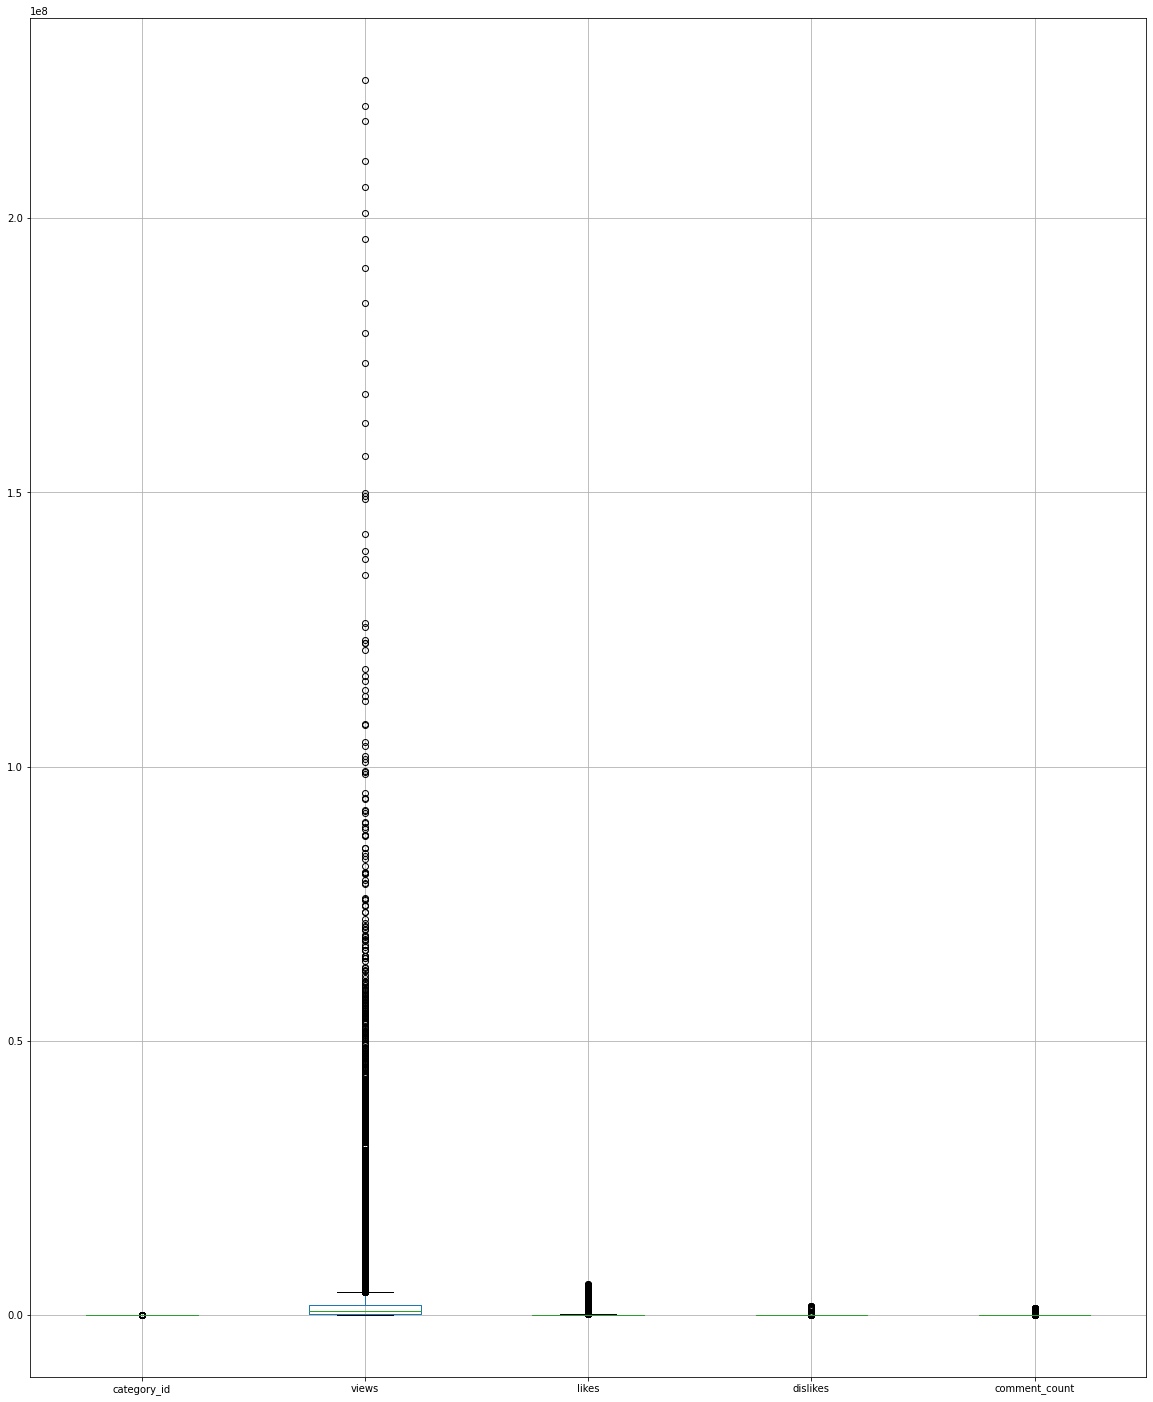

In [ ]:
df.boxplot(figsize=(20,25))

<AxesSubplot:>

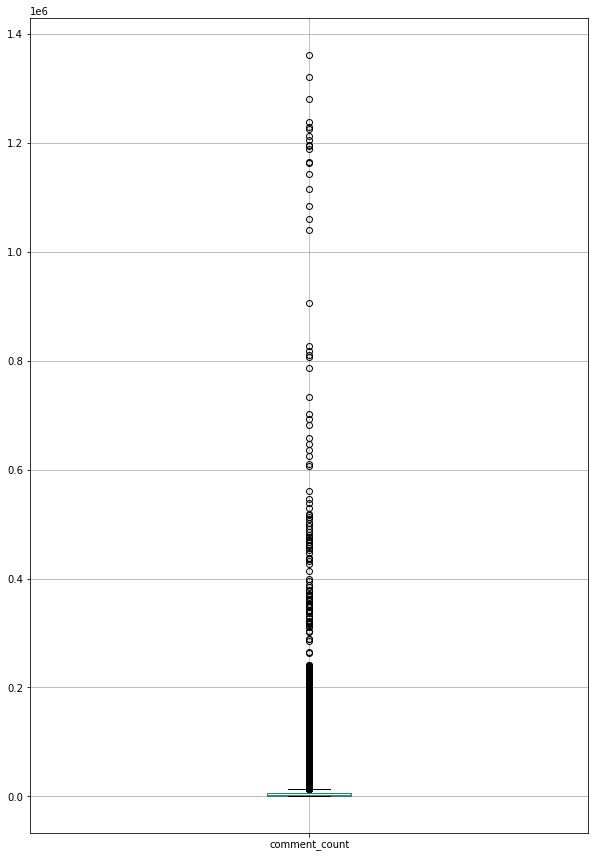

In [ ]:
df.boxplot(column='comment_count',figsize=(10,15))

<AxesSubplot:>

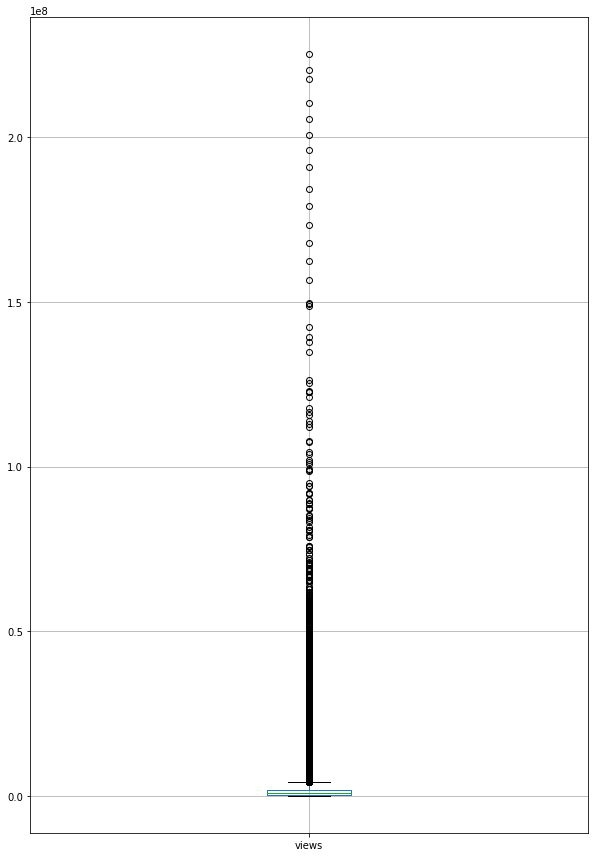

In [ ]:
df.boxplot(column='views',figsize=(10,15))

<AxesSubplot:>

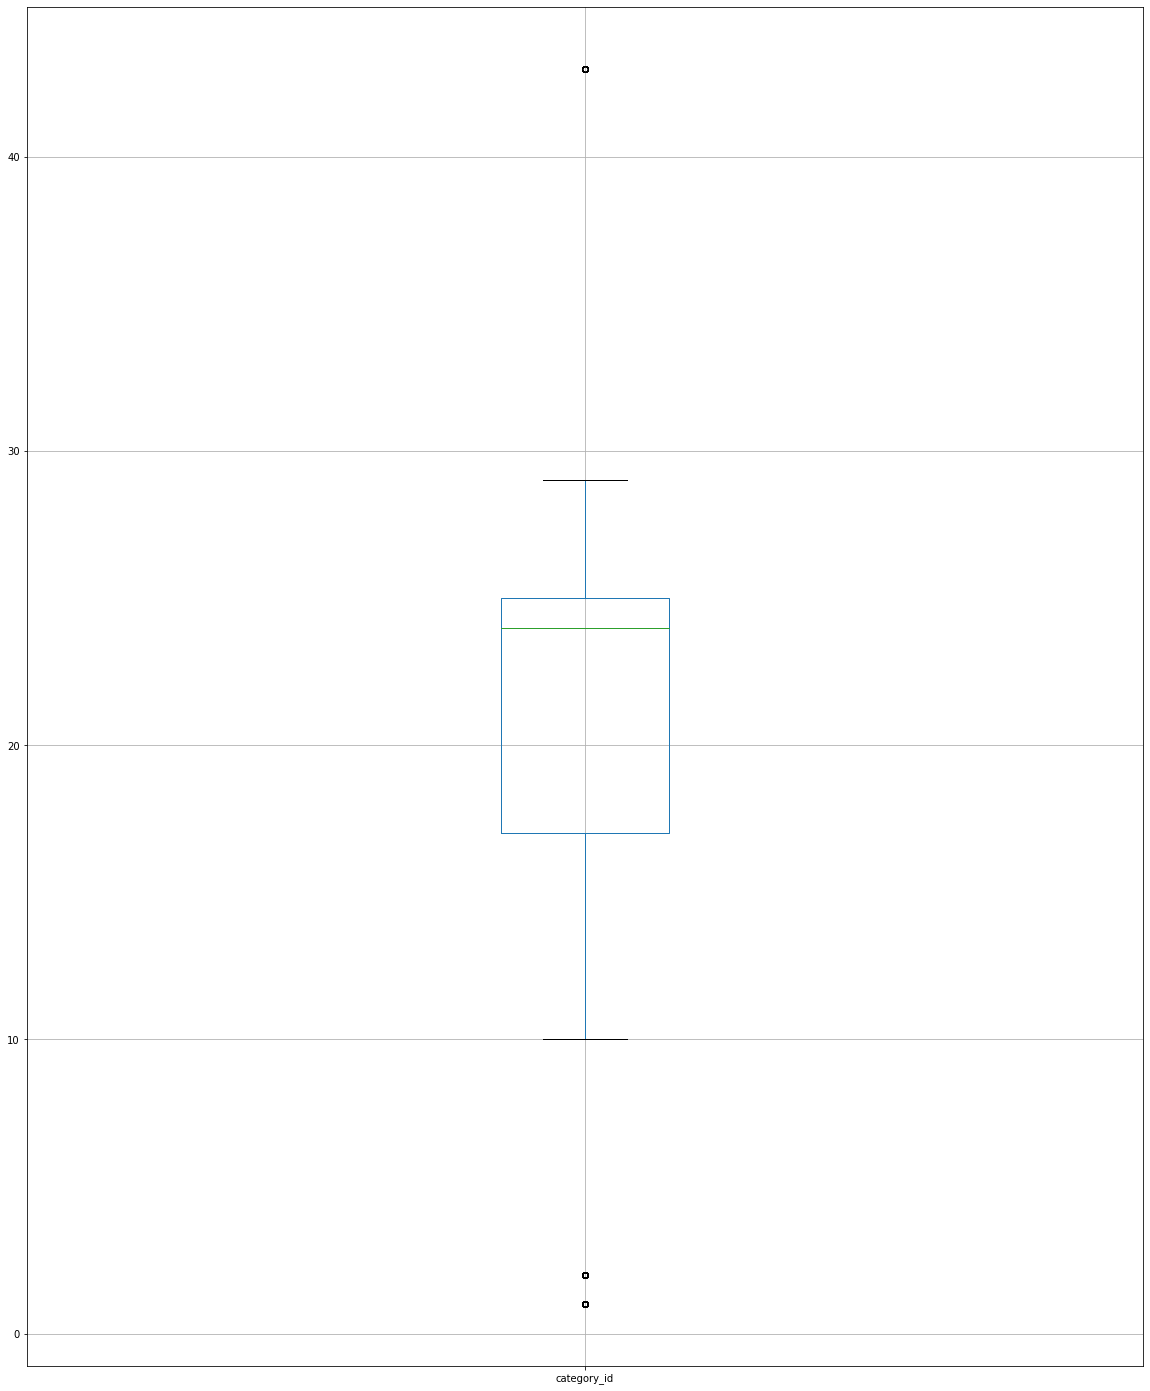

In [ ]:
df.boxplot(column='category_id',figsize=(20,25))

### By histogram

array([[<AxesSubplot:title={'center':'category_id'}>,
        <AxesSubplot:title={'center':'views'}>],
       [<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'dislikes'}>],
       [<AxesSubplot:title={'center':'comment_count'}>, <AxesSubplot:>]],
      dtype=object)

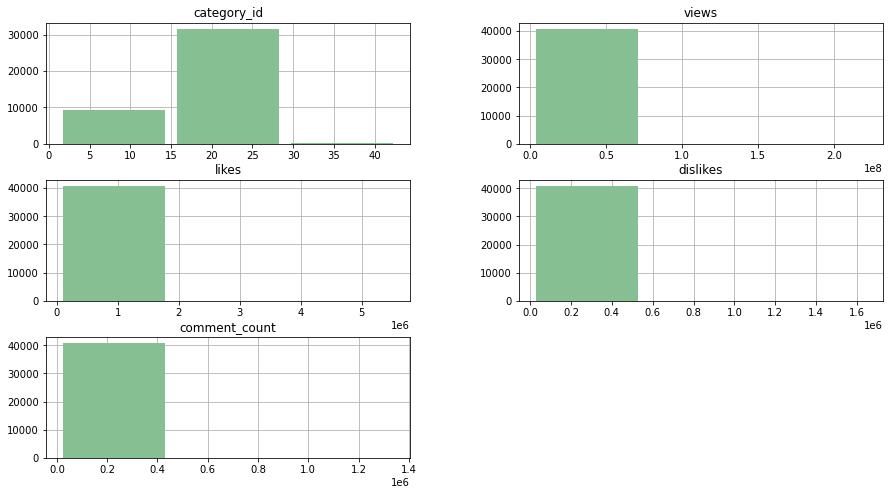

In [ ]:
df.hist(bins=3,figsize=(15,8), color='#86bf91', zorder=2, rwidth=0.9)

It's diffult to see with the histograms in our case.

### By Z-score
What Is a Z-Score? A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score.


An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean. Removing outliers from a pandas.DataFrame removes any rows in the DataFrame which contain an outlier. Outlier calculations are performed separately for each column.



In [ ]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [ ]:
df['category_id'].std()

7.568326828280351

In [ ]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(df['category_id'])

## Unique categories

There are **17 categories** in total.

In [ ]:
len(df.category_id.unique())

17

## Column type Adjustment

Is there any column that we need to adjust its type ?

The non-numerical variable will be converted to a numerical variable by mapping each unique label to a binary vector; the method is called one hot because for each vector only one value is non-null (hot) and the others are all zeros.

**One hot encoding** can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41415 entries, 0 to 41414
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                41415 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  float64
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  float64
 8   likes                   40949 non-null  float64
 9   dislikes                40949 non-null  float64
 10  comment_count           40949 non-null  float64
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  object 
 13  ratings_disabled        40949 non-null  object 
 14  video_error_or_removed  40949 non-null

We notice that we have 11 "object" types, that are more likely to be strings.

We cannot, however encode all of them! Some of them are titles, description or date.

These are another matter of work... For example, when it comes to "textual" data, there are many ways to do so <a href="https://medium.com/analytics-vidhya/nlp-text-encoding-a-beginners-guide-fa332d715854">(Text encoding for NLP)</a>, or even for encoding datetime <a href="https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/">(datetime cycling)</a>

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24.0,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
len(df.comments_disabled.unique())

3

In [ ]:
comments_disabled = pd.get_dummies(df.comments_disabled, prefix='comments_disabled')

In [ ]:
comments_disabled

,comments_disabled_False,comments_disabled_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41410,1,0
41411,1,0
41412,1,0
41413,1,0


We can encode many columns such as comments_disabled, channel_title,ratings_disabled	 and video_error_or_removed.

## Common tags

Get how many tags you have and which are the most common tags ?

In [ ]:
len(df['tags'].unique())

6056

In [ ]:
df['tags'].value_counts()

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        1535
ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"                                                       87
Ja